In [ ]:
#Reference: Python for Microscopists by DigitalSreeni - The best channel in my opinion.
# https://www.youtube.com/watch?v=jcUx-TQpcM8

In [ ]:
%matplotlib inline

# 0005_Basic Image Segmentation using Skimage - 1000 days of Python 

In [1]:
pwd

'D:\\desktop\\Python\\1000 days of python'

In [2]:
cd reference\digitalSreeni\python_for_microscopists-master

D:\desktop\Python\1000 days of python\reference\digitalSreeni\python_for_microscopists-master


In [3]:
pwd

'D:\\desktop\\Python\\1000 days of python\\reference\\digitalSreeni\\python_for_microscopists-master'

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import glob

from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu

## Segmentation using threshold_otsu from skimage.filters

threshold value: 2.963


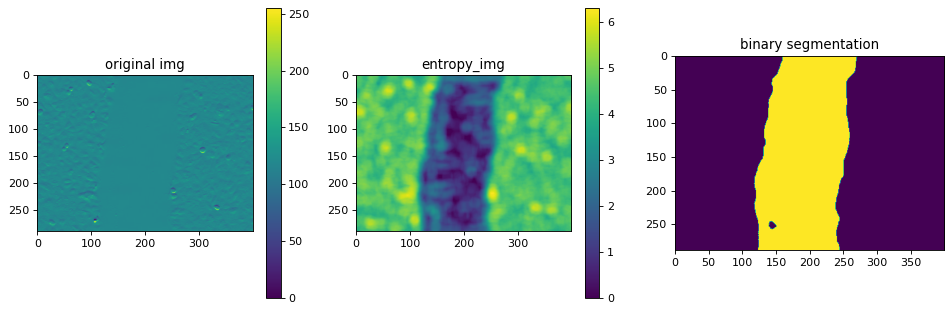

In [5]:
#Input image
img = io.imread("images/scratch.jpg")
#entropy image
entropy_img = entropy(img, disk(10))
#threshold value
thresh = threshold_otsu(entropy_img)
print('threshold value:',round(thresh,3))
#binary image
binary = entropy_img <= thresh

figure(figsize=(12,4), dpi=80)
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("original img")
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(entropy_img)
plt.title("entropy_img")
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(binary)
plt.title("binary segmentation")

plt.tight_layout()
plt.show()

## Getting information from binary segmentation image

In [6]:
#Number of pixel is less than the threshold or True or 1
print(np.sum(binary == True))

34396


## Work with multiple images

In [7]:
# images location: images/scratch_asany

time= 0 hr   Scratch area= 33426 pix²


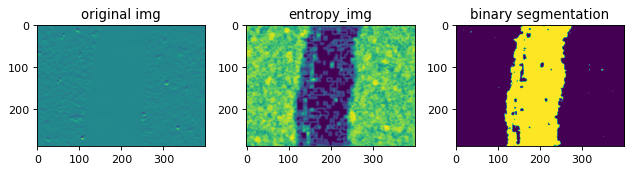

time= 1 hr   Scratch area= 27683 pix²


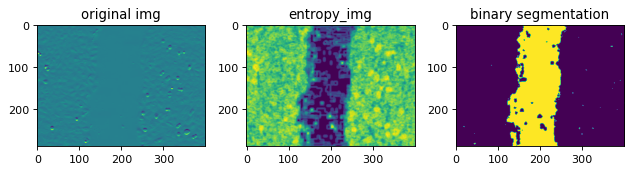

time= 2 hr   Scratch area= 24106 pix²


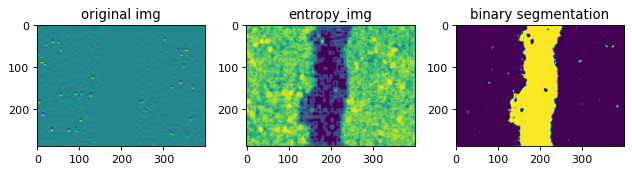

time= 3 hr   Scratch area= 21123 pix²


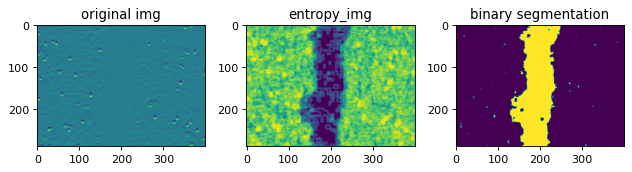

time= 4 hr   Scratch area= 18481 pix²


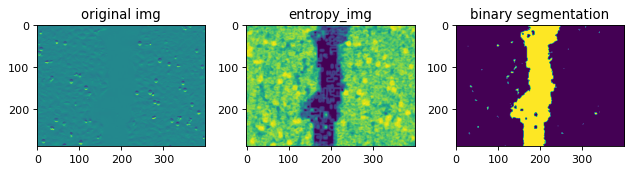

time= 5 hr   Scratch area= 16105 pix²


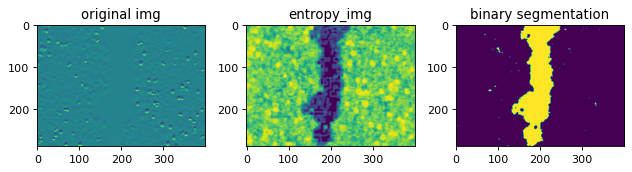

time= 6 hr   Scratch area= 14417 pix²


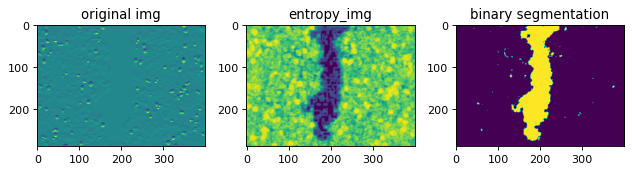

time= 7 hr   Scratch area= 12717 pix²


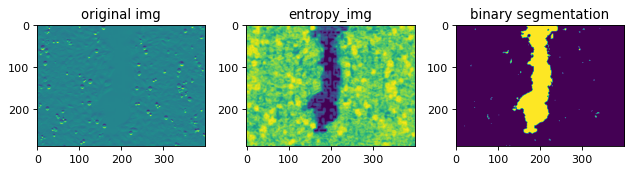

time= 8 hr   Scratch area= 10957 pix²


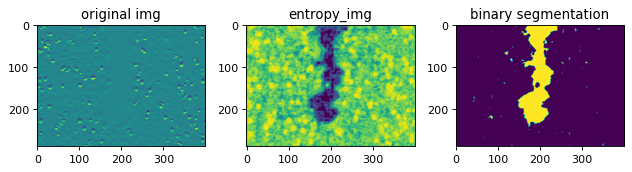

time= 9 hr   Scratch area= 9337 pix²


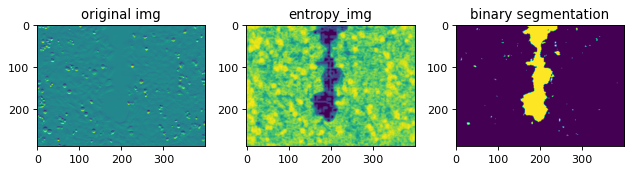

In [8]:
time = 0 # starting time

time_list=[] #list holding time
area_list=[] #list holding area

path = "images/scratch_assay/*.*"

for file in glob.glob(path):
    dict={}
    img=io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh

    scratch_area = np.sum(binary == 1)
    
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")
    
    figure(figsize=(8,4), dpi=80)
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("original img")

    plt.subplot(1,3,2)
    plt.imshow(entropy_img)
    plt.title("entropy_img")

    plt.subplot(1,3,3)
    plt.imshow(binary)
    plt.title("binary segmentation")
    
    plt.tight_layout()
    plt.show()

    time_list.append(time)
    area_list.append(round(scratch_area))
    time += 1

## Plotting results (relation ship between time and area)

LinregressResult(slope=-2504.9818181818187, intercept=30107.618181818187, rvalue=-0.9782077625497586, pvalue=9.611311663586532e-07, stderr=187.9815999729088, intercept_stderr=1003.5471264263972)
y =  -2504.9818181818187 x  +  30107.618181818187
R² =  0.9568904267126049
r-squared: 0.956890


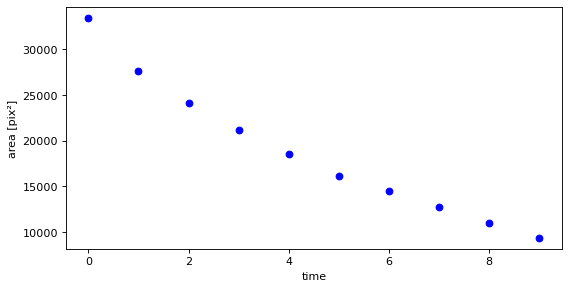

In [9]:
figure(figsize=(8,4), dpi=80)

#print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')  #Print blue dots scatter plot

#Print slope, intercept
from scipy.stats import linregress
print(linregress(time_list, area_list))

slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
print("r-squared: %f" % r_value**2)

# plt.xlabel(f'Time_list:\n {time_list}')
# plt.ylabel(f'Area_list [* 1000]:\n {area_list}')
plt.xlabel('time')
plt.ylabel('area [pix\N{SUPERSCRIPT TWO}]')
plt.show()